In [49]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

In [41]:
features_sector = pd.read_csv("../data_generator/data/features_sector.csv", dtype={"company_code": str})
feature_columns = [column for column in features_sector.columns if column != "company_code"]
sum = features_sector[feature_columns].sum(axis=1).to_frame(name="sum")
features_sector = pd.concat([features_sector, sum], axis=1)
print(features_sector.head())

  company_code  buy_A  buy_B  buy_C  buy_D  buy_E  buy_F  buy_G  buy_H  buy_I  \
0    010000247      0      0      0      0      7      0      4      0      2   
1    010000363      0      1      0      0      0      0      0      0      0   
2    010000391      0      0      0      0      0      5      7      0      0   
3    010000471      0      1      0      0      1      0      0      0      0   
4    010000597      0      0      0      0      8      2      2      0      0   

   ...  sell_E  sell_F  sell_G  sell_H  sell_I  sell_J  sell_K  sell_L  \
0  ...       0       0       0       0       0       0       0       0   
1  ...       0       0       3       0       0       0       0       0   
2  ...      23       0       2       0       1       0       0       1   
3  ...       0       0       0       0       0       0       0       0   
4  ...       0       1       4       1       0       0       0       1   

   sell_M  sum  
0       2   15  
1       0    4  
2       1   40  


In [17]:
# preprocessing
# dimensinoality reduction
# plot

In [66]:
# preprocessing
## filtering
sum_threshold = 100
features_above_threshold = features_sector[features_sector["sum"] >= sum_threshold].reset_index(drop=True)
print(len(features_above_threshold))
features_above_threshold = features_above_threshold.drop(columns=["company_code", "sum"]).to_numpy()

## feature scaling


11726


In [67]:
# UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=10, random_state=42)
embedding = reducer.fit_transform(features_above_threshold)

/Users/khyarmt/.pyenv/versions/3.12.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/var/folders/3w/mh02nngx6sl82_qf7gs3x3g80000gn/T/ipykernel_60448/2724137872.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=1)


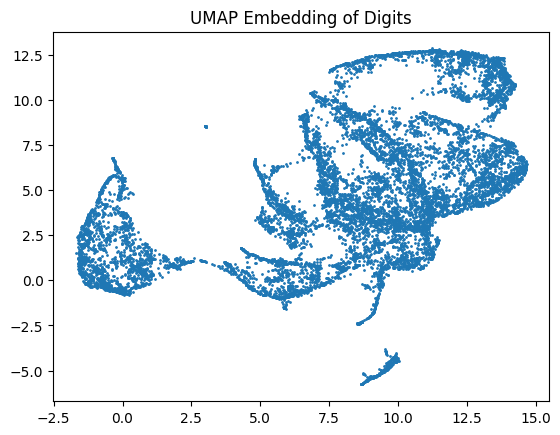

In [68]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=1)
plt.title('UMAP Embedding of Digits')
plt.show()